# Step II : Non-linear classification

In this example, similar to the previous one, the set of coordinates of the xy points are now separated using a parabolic curve. This kind of problem cannot be solved with a single neuron (which separates the point always by a straight line) and a deeper network will be needed.


Here we define the training set, formed by $XY$ points belonging to two classes, defined by 

$Y<aX²+bX+c$ 

or 

$Y>aX²+bX+c$. 

The Validation data set and a Testing data set are also defined.

In [1]:
import random
import numpy as np
import math
import matplotlib.pyplot as plt
    
def Training_set_parabole(a,b,c,Ntrain,Nval,Ntest):
    
    n = 0
    N = Ntrain+Nval+Ntest
    Data = np.zeros([N,2])
    Labels = np.zeros([N,1])
      
    for n in range(0,N):
        x = random.uniform(-1, 1)
        y = random.uniform(-1, 1)
        Data[n,0] = x
        Data[n,1] = y
        
        if y < a*x*x+b*x+c :
            Labels[n,0] = 1
        else : 
            Labels[n,0] = 0

    Training_data = Data[:Ntrain,]
    Training_label = Labels[:Ntrain,]
    Validation_data = Data[Ntrain+1:Ntrain+Nval,]
    Validation_label = Labels[Ntrain+1:Ntrain+Nval,]
    Testing_data = Data[Ntrain+Nval+1:N,]
    Testing_label = Labels[Ntrain+Nval+1:N,]
        
    return Training_data, Testing_data, Validation_data, Training_label, Validation_label, Testing_label 

The training/validation/testing sets are defined below. Try changing `Ntrain`, and see the effects on each model architecture you choose below.

In [2]:
a = 2;
b = 0;
c = -1;
Ntrain = 300
Nval = 50
Ntest = 50
    
Training_data, Testing_data, Validation_data, Training_label,Validation_label, Testing_label = Training_set_parabole(a,b,c,Ntrain,Nval,Ntest) 

The training set is then plot using two different colors
to distinguish the two classes


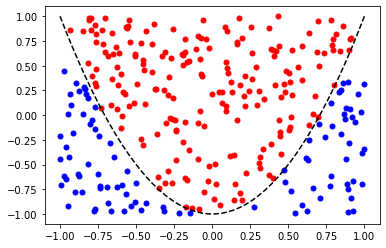

In [3]:
Idx_class_0 = Training_label==0
Idx_class_1 = Training_label==1

X0 = Training_data[Idx_class_0[:,0],0]
Y0 = Training_data[Idx_class_0[:,0],1]
X1 = Training_data[Idx_class_1[:,0],0]
Y1 = Training_data[Idx_class_1[:,0],1]

X = np.linspace(-1, 1, 50)
Y = a*X**2 + b*X + c  
        
plt.plot(X0, Y0, 'r.', ms=10)
plt.plot(X1, Y1, 'b.', ms=10)
plt.plot(X,Y,'--k')
plt.show()

In [4]:
len(X0)/300

0.6766666666666666

Define the architecture of the model. Here we will start with a single neuron (as in the previous example) and then build a more complex network. The input are however the same : the X and Y coordinates. Again, since we are working with two classes, the activation function is "sigmoid" and the loss function "binary cross-entropy". In the end the distinction between the two classes will be made on the base of whether the output will be below or above 0,5.

Note that the function "model.summary" will return a complete description of your network, highlighting the number of trainable parameters.

You can try different variations of the model: 
- 1 layer 1 neuron
- 1 layer multiple neurons
- multiple layers multiple neurons
 
Find the differences among these options, with this data set that cannot be linearly separated

In [5]:
from keras import models
from keras import layers
from keras import optimizers

model = models.Sequential()

# 1 layer, 1neuron - try this:
# model.add(layers.Dense(1, activation='relu', input_shape=(2,)))

# 1 layer, many neurons - try this:
# model.add(layers.Dense(5, activation='relu', input_shape=(2,)))
# model.add(layers.Dense(1, activation='sigmoid'))

# many layers, many neurons - try this, and modify the neurons in each per layer, and/or the number of layers:
model.add(layers.Dense(32, activation='relu', input_shape=(2,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))


model.compile(optimizer = 'adam', 
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                96        
                                                                 
 dense_1 (Dense)             (None, 16)                528       
                                                                 
 dense_2 (Dense)             (None, 1)                 17        
                                                                 
Total params: 641
Trainable params: 641
Non-trainable params: 0
_________________________________________________________________


Training of the model. The number of Epoch and the batch size are defined below. The results at each iteraction are saved in order to compare the accuracy calculated for the training set and for the validation set. These data are
saved in the variable history.


In [6]:
history = model.fit(Training_data,
                    Training_label,
                    epochs = 200,
                    batch_size = 16,
                    validation_data = (Validation_data, Validation_label))

Epoch 1/200
19/19 [==============================] - 1s 13ms/step - loss: 0.6575 - accuracy: 0.6767 - val_loss: 0.6547 - val_accuracy: 0.6327
Epoch 2/200
19/19 [==============================] - 0s 3ms/step - loss: 0.6083 - accuracy: 0.6833 - val_loss: 0.6189 - val_accuracy: 0.6327
Epoch 3/200
19/19 [==============================] - 0s 3ms/step - loss: 0.5625 - accuracy: 0.7367 - val_loss: 0.5896 - val_accuracy: 0.6939
Epoch 4/200
19/19 [==============================] - 0s 3ms/step - loss: 0.5238 - accuracy: 0.7433 - val_loss: 0.5674 - val_accuracy: 0.6531
Epoch 5/200
19/19 [==============================] - 0s 3ms/step - loss: 0.4937 - accuracy: 0.7467 - val_loss: 0.5488 - val_accuracy: 0.6327
Epoch 6/200
19/19 [==============================] - 0s 4ms/step - loss: 0.4725 - accuracy: 0.7433 - val_loss: 0.5374 - val_accuracy: 0.6735
Epoch 7/200
19/19 [==============================] - 0s 3ms/step - loss: 0.4563 - accuracy: 0.7700 - val_loss: 0.5252 - val_accuracy: 0.6327
Epoch 8/200


The accuracy of the model is tested using the testing set of data.

2/2 [==============================] - 0s 7ms/step


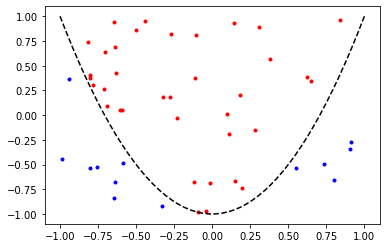

In [7]:
Results = model.predict(Testing_data)

Idx_class_0 = Results<0.5
Idx_class_1 = Results>=0.5

X0 = Testing_data[Idx_class_0[:,0],0]
Y0 = Testing_data[Idx_class_0[:,0],1]
X1 = Testing_data[Idx_class_1[:,0],0]
Y1 = Testing_data[Idx_class_1[:,0],1]

X = np.linspace(-1, 1, 50)
Y = a*X**2 + b*X + c      
        
plt.plot(X0, Y0, 'r.')
plt.plot(X1, Y1, 'b.')
plt.plot(X,Y,'--k')
plt.show() 

In the same way, using the model.evaluate function you can test the accuracy of the model when working on the testing
set. The second number returns the average accuracy.

In [8]:
Predication_accuracy = model.evaluate(Testing_data, Testing_label)
print(Predication_accuracy)

2/2 [==============================] - 0s 5ms/step - loss: 0.0135 - accuracy: 1.0000
[0.013488593511283398, 1.0]


Below the accuracy for the training and validation sets are plotted

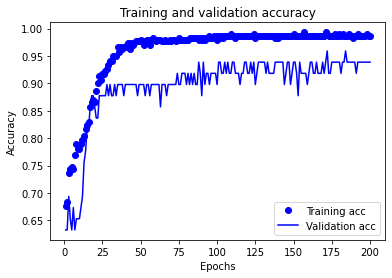

In [9]:
history_dict = history.history

acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']

n = len(acc_values)
epochs = range(1, n+1)

plt.plot(epochs, acc_values, 'bo', label='Training acc')
plt.plot(epochs, val_acc_values, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

Below the validation loss for the training and validation sets are plotted

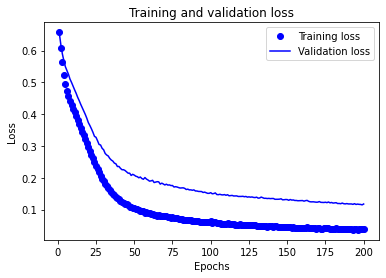

In [10]:
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

Let's plot the prediction of the testing set.

In [ ]:
Results.shape

(49, 5)

2/2 [==============================] - 0s 7ms/step


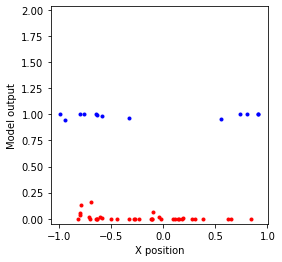

In [11]:
Results = model.predict(Testing_data)

X0 = []
X1 = []
Y0 = []
Y1 = []
#for n in range(0,Length):
for n in range(0, len(Testing_data)):

    if Results[n]<=0.5:
        X0.append(Results[n])
        Y0.append(Testing_data[n,0])
    else:
        X1.append(Results[n])
        Y1.append(Testing_data[n,0])
        
plt.plot(Y0, X0, 'r.')
plt.plot(Y1, X1, 'b.')
plt.ylabel('Model output')
plt.xlabel('X position')
plt.axis('square')
plt.show()

Let's plot the prediction of a more regular testing set, which clearly shows the performance of the model with nw data

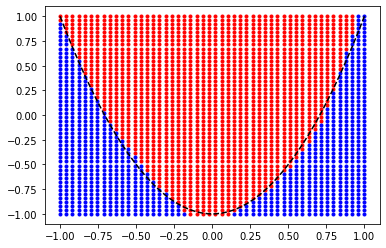

In [ ]:
x = np.linspace(-1, 1, 50)
y = np.linspace(-1, 1, 50)
X, Y = np.meshgrid(x, y)
X = X.flatten()
Y = Y.flatten()

Test = np.vstack((X,Y))
Test = np.transpose(Test)
Results = model.predict(Test)

Idx_class_0 = Results<0.5
Idx_class_1 = Results>=0.5

X0 = Test[Idx_class_0[:,0],0]
Y0 = Test[Idx_class_0[:,0],1]
X1 = Test[Idx_class_1[:,0],0]
Y1 = Test[Idx_class_1[:,0],1]

X = np.linspace(-1, 1, 50)
Y = a*X**2 + b*X + c        
        
plt.plot(X0, Y0, 'r.')
plt.plot(X1, Y1, 'b.')
plt.plot(X,Y,'--k')
plt.show() 